In [16]:
#%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [17]:
import numpy as np
import pandas as pd

In [18]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [19]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [20]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [21]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [22]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [23]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [24]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [25]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

lastdate = session.query(Measurement).order_by(Measurement.date.desc()).first().date
#print(lastdate)
one_year_ago_date = (dt.datetime.strptime(lastdate,'%Y-%m-%d') - relativedelta(years=1)).strftime("%Y-%m-%d")
#print(one_year_ago_date)

all_data_df = pd.read_sql(session.query(Measurement).statement,engine,index_col='id')

past_year_data = (session.query(Measurement)
                  .filter(Measurement.date >= one_year_ago_date)
                  .filter(Measurement.date <= lastdate)
                  .order_by(Measurement.date))

# the readme.md asks for just the date and prcp, so to do that i'd replace session.query(Measurement) with
# session.query(Meaurement.station, Measurement.prcp)

past_year_data_df = pd.read_sql(past_year_data.statement,engine,index_col='id')
past_year_data_df.head(50)

,station,date,prcp,tobs
id,,,,
2364,USC00519397,2016-08-23,0.00,81.0
5091,USC00513117,2016-08-23,0.15,76.0
7331,USC00514830,2016-08-23,0.05,80.0
8825,USC00517948,2016-08-23,NaN,80.0
11851,USC00519523,2016-08-23,0.02,80.0
14608,USC00519281,2016-08-23,1.79,77.0
19202,USC00516128,2016-08-23,0.70,74.0
2365,USC00519397,2016-08-24,0.08,79.0
5092,USC00513117,2016-08-24,2.15,76.0


In [50]:
now = datetime.now()
if lastdate < now.strftime("%Y-%m-%d"):
    print('hi')

hi


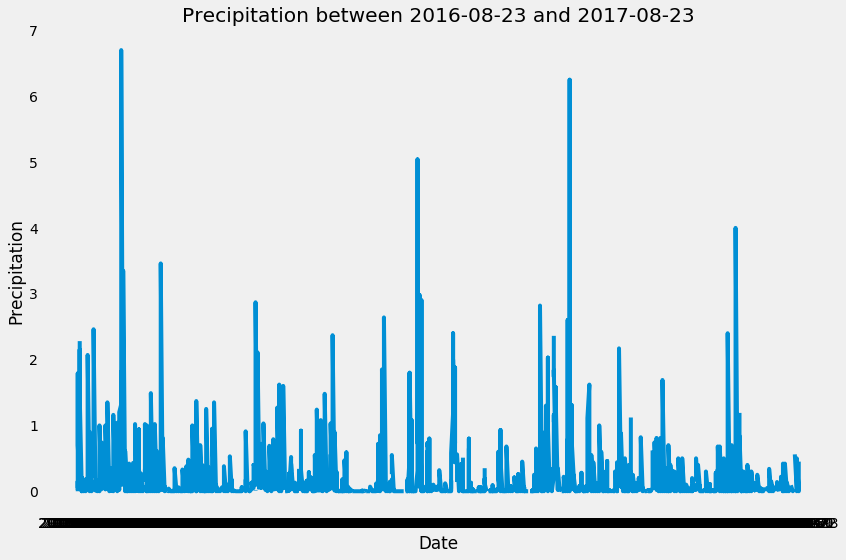

In [27]:
plt.figure(figsize=(12,8))
plt.plot(past_year_data_df.date,past_year_data_df.prcp)
plt.grid(b=None)
plt.title(f"Precipitation between {one_year_ago_date} and {lastdate}")
plt.ylabel("Precipitation")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

In [1]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


![precipitation](Images/precipitation.png)

In [28]:
# Use Pandas to calcualte the summary statistics for the precipitation data
#all_data_df.describe()
#the image matches with the dataframem for just the past year, but the prompt only really asks for "the precipitation data"
#which would be all_data_df.describe().


past_year_data_df.describe()

,prcp,tobs
count,2021.000000,2230.000000
mean,0.177279,74.590583
std,0.461190,4.611667
min,0.000000,58.000000
25%,0.000000,72.000000
50%,0.020000,75.000000
75%,0.130000,78.000000
max,6.700000,87.000000


In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

![describe](Images/describe.png)

In [15]:
# Design a query to show how many stations are available in this dataset?
print(session.query(Station.name).distinct().count())
print(session.query(Station.station).distinct().count())

9
9


In [30]:
# Double check, printing all rows and checking that all are unique
for _ in session.query(Station).all():
    print(_.__dict__)

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x00000116831B5F98>, 'longitude': -157.8168, 'latitude': 21.2716, 'station': 'USC00519397', 'elevation': 3.0, 'name': 'WAIKIKI 717.2, HI US', 'id': 1}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x00000116831B5828>, 'longitude': -157.8015, 'latitude': 21.4234, 'station': 'USC00513117', 'elevation': 14.6, 'name': 'KANEOHE 838.1, HI US', 'id': 2}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x00000116831B5FD0>, 'longitude': -157.8374, 'latitude': 21.5213, 'station': 'USC00514830', 'elevation': 7.0, 'name': 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 'id': 3}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x00000116831B5F60>, 'longitude': -157.9751, 'latitude': 21.3934, 'station': 'USC00517948', 'elevation': 11.9, 'name': 'PEARL CITY, HI US', 'id': 4}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x00000116831B5908>, 'longitude': 

In [31]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

station_df = pd.read_sql(session.query(Measurement.station,func.count(Measurement.station).label('count_station'))
                         .group_by(Measurement.station)
                         .order_by(func.count(Measurement.station).desc())
                         .statement,engine)
station_df.head(9)

,station,count_station
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [13]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


[(54.0, 85.0, 71.66378066378067)]

In [32]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

#hard coded becuase it says "using the station id from the previous query"
(session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs))
.filter(Measurement.station == 'USC00519281')
.all())

[(54.0, 85.0, 71.66378066378067)]

<function matplotlib.pyplot.show(*args, **kw)>

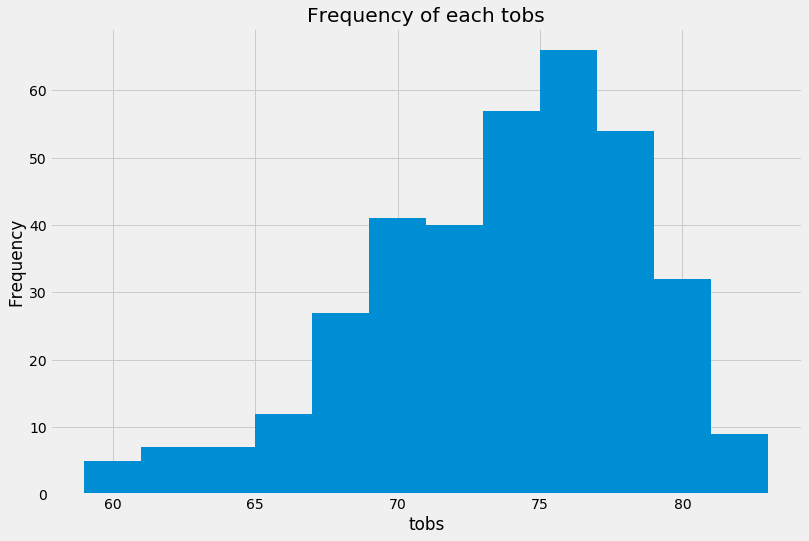

In [33]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_station_df = pd.read_sql(session.query(Measurement.station,func.count(Measurement.tobs).label('count_tobs'))
                         .group_by(Measurement.station)
                         .order_by(func.count(Measurement.tobs).desc())
                         .statement,engine)
#temp_station_df.head(9)
#still USC00519281
last_date_temp = session.query(Measurement).filter(Measurement.station == 'USC00519281').order_by(Measurement.date.desc()).first().date
#print(last_date_temp)
year_ago_date = (datetime.strptime(last_date_temp,'%Y-%m-%d')-relativedelta(years=1)).strftime('%Y-%m-%d')

#print(year_ago_date)
past_year_data_only_max_station = (session.query(Measurement)
                                   .filter(Measurement.station == 'USC00519281')
                                   .filter(Measurement.date <= last_date_temp)
                                   .filter(Measurement.date >= year_ago_date)
                                   .order_by(Measurement.date.desc()))
past_year_data_only_max_station_df = pd.read_sql(past_year_data_only_max_station.statement,engine,index_col='id')
#past_year_data_only_max_station_df.head(50) 

plt.figure(figsize=(12,8))
plt.hist(past_year_data_only_max_station_df['tobs'],bins=12)
plt.ylabel('Frequency')
plt.title('Frequency of each tobs')
plt.xlabel('tobs')
plt.show

In [1]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [34]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [41]:
now = datetime.now()
print(calc_temps('2012-02-28',now.strftime("%Y-%m-%d")))
print(now.strftime("%Y-%m-%d"))

[(53.0, 73.43127438710152, 87.0)]
2019-05-03


In [30]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

# set trip dates

trip_start = '2015-07-31'
trip_end = '2015-08-15'

(calc_min,calc_avg,calc_max) = calc_temps(trip_start, trip_end)[0]
print(calc_min,calc_avg,calc_max)

69.0 78.53465346534654 85.0


<BarContainer object of 1 artists>

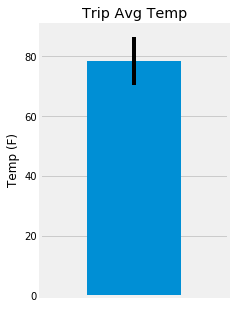

In [31]:
plt.figure(figsize=(3,5))
plt.tight_layout()
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")
plt.xlim(-0.75,.75)
plt.xticks([])
plt.bar(0,calc_avg,yerr=(calc_max-calc_min)/2,width=0.75)

<IPython.core.display.Javascript object>


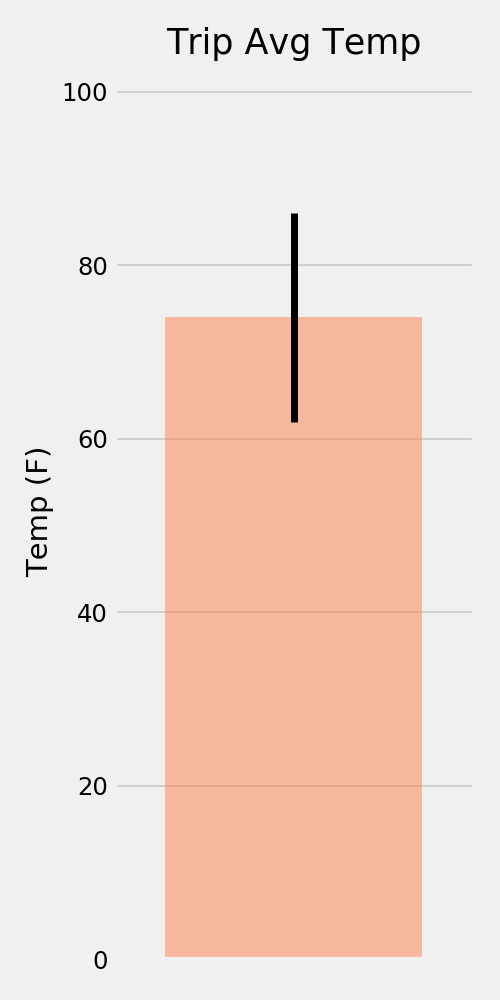

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [26]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

station_by_total_prcp = (session.query(Measurement.station,Station.name,Station.latitude, Station.longitude,Station.elevation,func.sum(Measurement.prcp))
        .filter(Measurement.station == Station.station)
        .group_by(Measurement.station)
        .order_by(func.sum(Measurement.prcp).desc())
        .all())


station_by_total_prcp_df = pd.DataFrame(station_by_total_prcp,
                                        columns=['StationID','StationName','Lat','Long','Elevation','TotalPrcp'])
station_by_total_prcp_df.head(10)

,StationID,StationName,Lat,Long,Elevation,TotalPrcp
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,1068.09
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,588.64
2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,382.62
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,295.68
4,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,234.49
5,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,131.62
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9,92.68
7,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6,70.87
8,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,43.44


In [19]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [32]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [53]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

trip_start_md = datetime.strftime(datetime.strptime(trip_start,'%Y-%m-%d'),'%m-%d')
trip_end_md = datetime.strftime(datetime.strptime(trip_end,'%Y-%m-%d'),'%m-%d')

date_list = [trip_start_md]

each_date = trip_start_md

while each_date != trip_end_md:
    each_date = (datetime.strptime(each_date,'%m-%d') + relativedelta(days=1)).strftime('%m-%d')
    date_list.append(each_date)
    
print(date_list)

daily_normals_list = [daily_normals(_)[0] for _ in date_list]

print(daily_normals_list)

['07-31', '08-01', '08-02', '08-03', '08-04', '08-05', '08-06', '08-07', '08-08', '08-09', '08-10', '08-11', '08-12', '08-13', '08-14', '08-15']
[(72.0, 77.03571428571429, 83.0), (67.0, 75.54, 83.0), (68.0, 75.60377358490567, 84.0), (70.0, 76.61111111111111, 85.0), (69.0, 76.71153846153847, 84.0), (69.0, 76.14814814814815, 82.0), (67.0, 76.25, 83.0), (71.0, 77.15686274509804, 83.0), (68.0, 76.5576923076923, 83.0), (69.0, 75.98039215686275, 81.0), (65.0, 76.42, 83.0), (67.0, 75.98113207547169, 82.0), (67.0, 76.52727272727273, 83.0), (71.0, 76.98245614035088, 84.0), (71.0, 76.77777777777777, 82.0), (69.0, 76.47169811320755, 83.0)]


In [58]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

daily_normals_df = pd.DataFrame(daily_normals_list,index=date_list,columns=['min','avg','max'])
daily_normals_df.head(16)

,min,avg,max
07-31,72.0,77.035714,83.0
08-01,67.0,75.540000,83.0
08-02,68.0,75.603774,84.0
08-03,70.0,76.611111,85.0
08-04,69.0,76.711538,84.0
08-05,69.0,76.148148,82.0
08-06,67.0,76.250000,83.0
08-07,71.0,77.156863,83.0
08-08,68.0,76.557692,83.0
08-09,69.0,75.980392,81.0


<function matplotlib.pyplot.show(*args, **kw)>

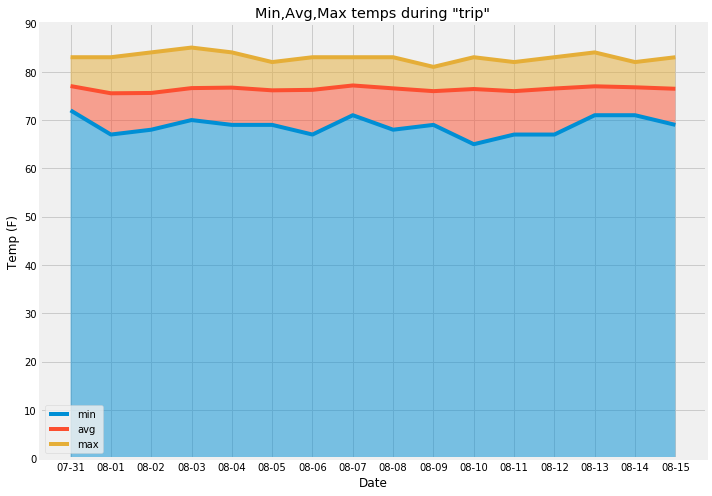

In [85]:
# Plot the daily normals as an area plot with `stacked=False`

plt.figure(figsize=(10,7))
plt.plot(daily_normals_df.index,daily_normals_df)
plt.fill_between(daily_normals_df.index, daily_normals_df['min'],alpha=0.5)
plt.fill_between(daily_normals_df.index, daily_normals_df['min'], daily_normals_df['avg'],alpha=0.5)
plt.fill_between(daily_normals_df.index, daily_normals_df['avg'], daily_normals_df['max'],alpha=0.5)
plt.ylim((0,90))
plt.ylabel("Temp (F)")
plt.xlabel('Date')
plt.gca().legend(('min','avg','max'))
plt.title('Min,Avg,Max temps during "trip"')
plt.tight_layout()
plt.show

<IPython.core.display.Javascript object>


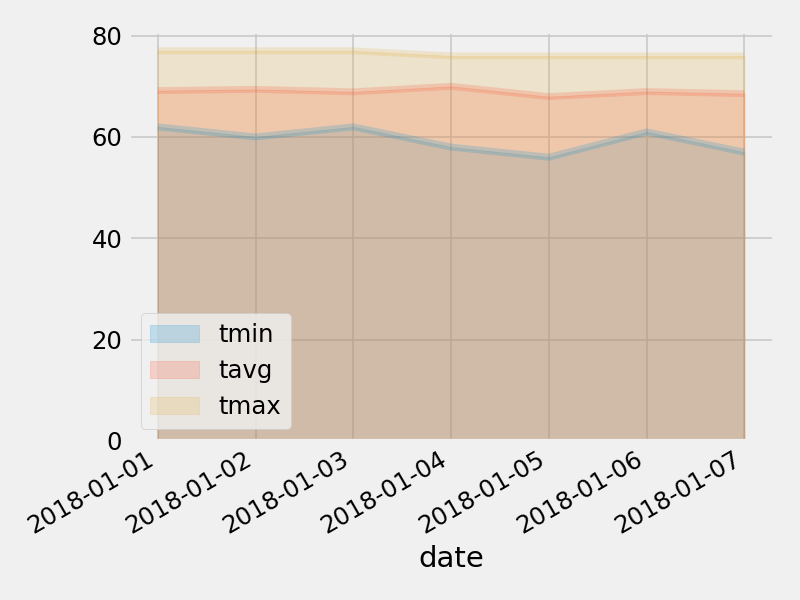

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
